# Theory
## Variance
$$\displaystyle Var(x)=\sum_{i=1}^n\frac{(x_i-\bar{x})^2}{n}$$
$\bar{x}$ is the mean of the feature $x$.
## Covariance
$$\displaystyle Cov(x,y)=\sum_{i=1}^n\frac{(x_i-\bar{x})(y_i-\bar{y})}{n}$$
Covariance is calculated for 2-dimensional points $(x,y)$
## Correlation coefficient
$$\displaystyle Corr(x,y)=\frac{Cov(x,y)}{\sqrt{Var(x)}\sqrt{Var(y)}}$$
***
## Why do we need to eliminate certain features?
Ther is something called "curse of dimensionality" which arise when dealing with data in high-dimensional spaces, particularly in machine learning and data analysis contexts. As the number of features or dimensions in a dataset increases, several issues become more prominent:
- **Sparsity of Data:** In high-dimensional spaces, data points become increasingly sparse. This sparsity can lead to challenges in accurately estimating probability densities and distances between data points.
- **Increased Computational Complexity:** Many algorithms exhibit exponential growth in computational complexity as the number of dimensions increases. This can make processing and analyzing high-dimensional data computationally expensive and time-consuming.
- **Overfitting:** With a large number of dimensions, models can become overly complex and fit to noise in the data rather than capturing meaningful patterns. This can lead to overfitting, where the model performs well on the training data but generalizes poorly to unseen data.
- **Difficulty in Visualization:** As the number of dimensions increases, it becomes increasingly difficult to visualize the data and understand its underlying structure. While techniques such as dimensionality reduction can help mitigate this issue, they may also result in loss of information.
- **Increased Data Requirements:** With higher dimensions, exponentially more data may be required to adequately sample the space, making data collection and storage more challenging.
## This is where Covariance and Correlation coefficient comes into the picture
- **Covariance:** Covariance measures how much two variables change together.
    - If the covariance is positive, it means that when one variable increases, the other tends to increase as well.
    - Conversely, if the covariance is negative, it means that when one variable increases, the other tends to decrease.
    - However, the magnitude of covariance is not standardized, so it can be difficult to interpret the strength of the relationship.
- **Correlation Coefficient:** The correlation coefficient is a standardized measure of the linear relationship between two variables. It ranges from -1 to 1.
    - A correlation coefficient of 1 indicates a perfect positive linear relationship, -1 indicates a perfect negative linear relationship, and 0 indicates no linear relationship.
    - Unlike covariance, correlation coefficient gives a standardized measure of the strength and direction of the relationship between two variables, making it easier to interpret.
***
# Importing the libraries and loading the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
data_frame = pd.DataFrame(data.data, columns = data.feature_names)

In [2]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [3]:
data.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [4]:
X = data_frame.copy()
Y = data.target

In [5]:
data_frame["MEDV"] = data.target
data_frame

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [6]:
X.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


# Visualizing the Correlation Coefficient Matrix

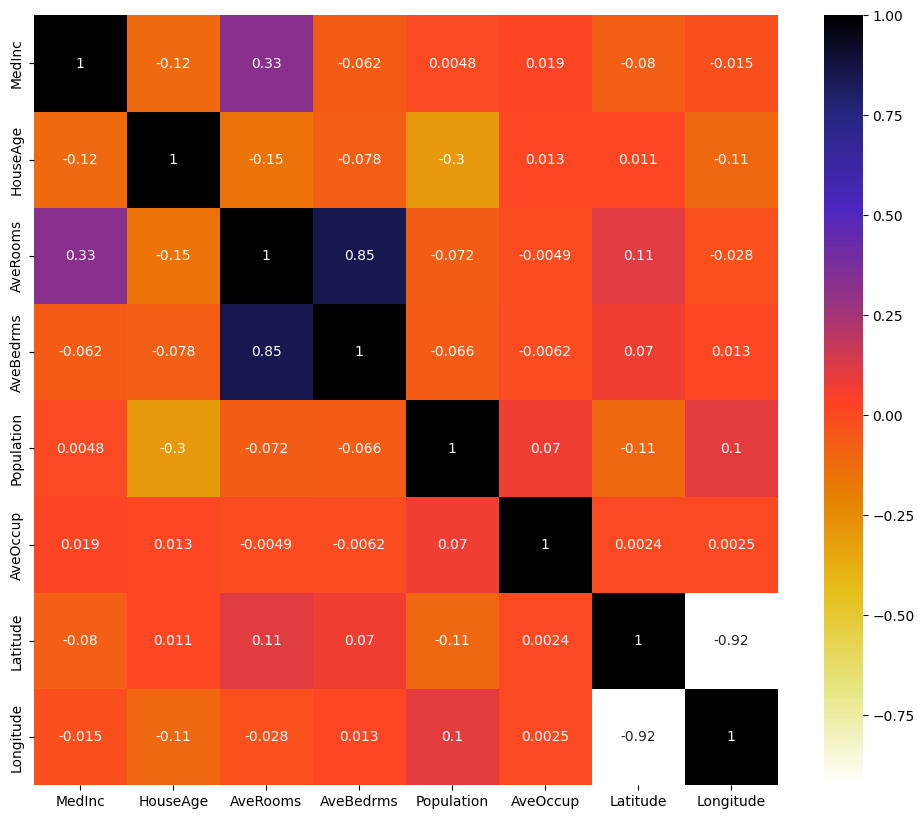

In [7]:
import seaborn as sns

plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

## Determining redundant features
With the following function we can select highly correlated features. It will remove the first feature that is correlated with anything other feature.

In [8]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [9]:
corr_features = correlation(X, 0.7)
corr_features

{'AveBedrms', 'Longitude'}

In [10]:
X.drop(corr_features, axis = 'columns')

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude
0,8.3252,41.0,6.984127,322.0,2.555556,37.88
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86
2,7.2574,52.0,8.288136,496.0,2.802260,37.85
3,5.6431,52.0,5.817352,558.0,2.547945,37.85
4,3.8462,52.0,6.281853,565.0,2.181467,37.85
...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,845.0,2.560606,39.48
20636,2.5568,18.0,6.114035,356.0,3.122807,39.49
20637,1.7000,17.0,5.205543,1007.0,2.325635,39.43
20638,1.8672,18.0,5.329513,741.0,2.123209,39.43


***